In [1]:
import torch

In [2]:
dir_name = "sep_arm_result_4"
ind_size = 10
beta_ucb = 50
method_name = "fixed_context_gp_hetero"
trial_number = 0
result_name = "./{}/{}_{}_{}_{}.pth".format(dir_name, 
                                       ind_size,
                                       beta_ucb,
                                       method_name,
                                       trial_number)

In [3]:
results = torch.load(result_name)

In [4]:
results.keys()

dict_keys(['ind', 'dim', 'tasks', 'record_1', 'model_1', 'likelihood_1', 'record_2', 'model_2', 'likelihood_2', 'record_3', 'model_3', 'likelihood_3', 'record_4', 'model_4', 'likelihood_4', 'record_5', 'model_5', 'likelihood_5', 'record_6', 'model_6', 'likelihood_6', 'record_7', 'model_7', 'likelihood_7', 'record_8', 'model_8', 'likelihood_8', 'record_9', 'model_9', 'likelihood_9', 'record_10', 'model_10', 'likelihood_10', 'record_tasks', 'model_tasks', 'likelihood_tasks'])

In [5]:
results['ind']
results['dim']
results['tasks']

[tensor([0.5919, 0.3908]),
 tensor([0.7699, 0.6206]),
 tensor([0.9180, 0.0258]),
 tensor([0.1247, 0.2860]),
 tensor([0.6321, 0.4701]),
 tensor([0.2571, 0.1188]),
 tensor([0.4654, 0.5403]),
 tensor([0.8898, 0.8207]),
 tensor([0.3585, 0.9521]),
 tensor([3.9467e-04, 7.6121e-01])]

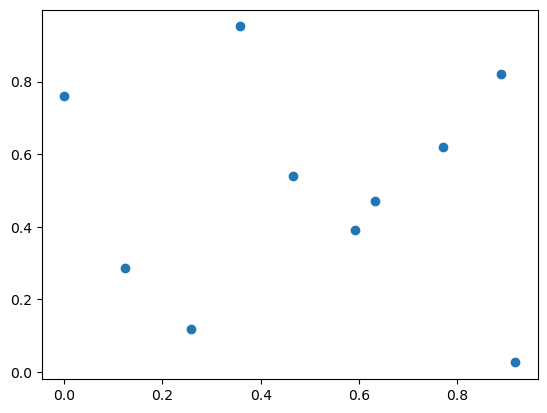

In [6]:
import matplotlib.pyplot as plt
tasks = torch.stack(results['tasks'])
plt.scatter(tasks[:, 0], tasks[:, 1])
plt.show()

In [8]:
from problems import get_problem
problem_name = "sep_arm"
n_dim = 4
problem = get_problem(name=problem_name, problem_params=n_dim)

In [9]:
my_sol = torch.rand(4)
task_id = 3
print("my_sol is {}".format(my_sol))
my_result = problem.evaluate(torch.cat([my_sol, tasks[task_id, :]], dim=0))
print("my_result is {}".format(my_result))

my_sol is tensor([0.5826, 0.0584, 0.2973, 0.3646])
my_result is 0.5097928438314863


In [10]:
def solve_task(task_id, sol):
    my_sol = sol
    print("my_sol is {}".format(my_sol))
    my_result = problem.evaluate(torch.cat([my_sol, tasks[task_id - 1, :]], dim=0))
    print("my_result is {}".format(my_result))
    return my_result

The shape is torch.Size([10, 4]).
tensor([[1.0000, 0.6594, 0.4789, 0.5893, 0.5919, 0.3908, 0.0155]])


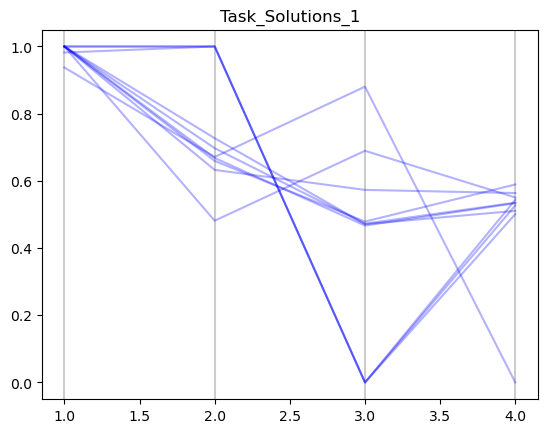

In [12]:
from utils import debug_plot
retrieve_id = 1
elite_size = 10
task_result = results["record_{}".format(retrieve_id)]
sort_results, sort_inds = torch.sort(task_result, dim=0)
filtered_sol = task_result[sort_inds[:, -1], :][:elite_size, :4]
debug_plot(filtered_sol, "Task_Solutions_{}".format(retrieve_id))
print(task_result[sort_inds[:, -1], :][:1, :])
plt.show()

In [13]:
filtered_sol[0, :]
new_task_id = 1
solve_task(new_task_id, filtered_sol[7, :])

my_sol is tensor([0.9375, 0.6710, 0.8804, 0.0000])
my_result is 0.03601659079945985


0.03601659079945985

In [14]:
sort_results, sort_inds = torch.sort(task_result, dim=0)

In [15]:
task_result[sort_inds[:, -1], -1]

tensor([0.0155, 0.0167, 0.0201, 0.0267, 0.0308, 0.0344, 0.0354, 0.0360, 0.0365,
        0.0366, 0.0379, 0.0390, 0.0392, 0.0393, 0.0394, 0.0398, 0.0413, 0.0415,
        0.0419, 0.0448, 0.0452, 0.0454, 0.0456, 0.0460, 0.0490, 0.0517, 0.0517,
        0.0519, 0.0540, 0.0557, 0.0603, 0.0605, 0.0613, 0.0624, 0.0629, 0.0631,
        0.0632, 0.0648, 0.0654, 0.0659, 0.0659, 0.0663, 0.0670, 0.0674, 0.0681,
        0.0682, 0.0686, 0.0695, 0.0699, 0.0707, 0.0717, 0.0718, 0.0723, 0.0738,
        0.0747, 0.0755, 0.0766, 0.0777, 0.0783, 0.0792, 0.0793, 0.0794, 0.0795,
        0.0816, 0.0823, 0.0828, 0.0845, 0.0850, 0.0850, 0.0851, 0.0863, 0.0876,
        0.0878, 0.0897, 0.0900, 0.0901, 0.0928, 0.0963, 0.0986, 0.1001, 0.1006,
        0.1012, 0.1032, 0.1040, 0.1046, 0.1073, 0.1073, 0.1073, 0.1073, 0.1073,
        0.1082, 0.1085, 0.1091, 0.1116, 0.1116, 0.1139, 0.1143, 0.1171, 0.1198,
        0.1199, 0.1201, 0.1202, 0.1203, 0.1216, 0.1222, 0.1230, 0.1236, 0.1236,
        0.1236, 0.1241, 0.1242, 0.1260, 

The shape is torch.Size([10, 4]).


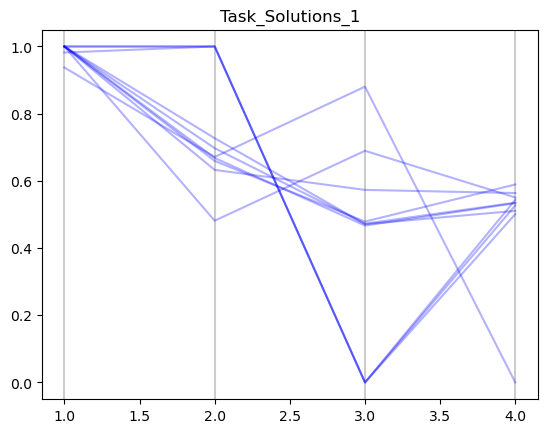

In [16]:
debug_plot(task_result[sort_inds[:, -1], :][:10, :4], "Task_Solutions_{}".format(retrieve_id))
plt.show()

In [17]:
import numpy as np
sol = np.random.rand(10)
print(sol)

[0.55514431 0.72741405 0.97887606 0.0195534  0.37169143 0.87843185
 0.00110905 0.43712897 0.14805564 0.29983465]


In [18]:
new_sol = sol[:6]
new_hook = sol[6:]
print("new_sol is {} and new_hook is {}".format(new_sol, new_hook))

new_sol is [0.55514431 0.72741405 0.97887606 0.0195534  0.37169143 0.87843185] and new_hook is [0.00110905 0.43712897 0.14805564 0.29983465]


In [57]:
# Define a function so that given a input dim k, 
# we got a matrix of size [2, K] to transform a [2, ] 
# dim vector to a [K, ] dim vector

def gen_mat(k):
    mat_placeholder = np.zeros((2, k))
    assert k > 1
    mat_placeholder[1, :] = np.arange(0, k)/(k - 1)
    mat_placeholder[0, :] = np.arange(k-1, -1, -1)/(k - 1)
    return mat_placeholder.T

In [42]:
def print_arange(k):
    assert k > 1
    forward_result = np.arange(0, k)/(k - 1)
    reverse_result = np.arange(k-1, -1, -1)/(k - 1)
    print("forward_result: {}\n reverse_result:{}".format(forward_result, reverse_result))

In [32]:
for i in range(3, 10):
    print("Debug: result for pring_arange {}".format(i))
    print_arange(i)

Debug: result for pring_arange 3
forward_result: [0.  0.5 1. ]
 reverse_result:[1.  0.5 0. ]
Debug: result for pring_arange 4
forward_result: [0.         0.33333333 0.66666667 1.        ]
 reverse_result:[1.         0.66666667 0.33333333 0.        ]
Debug: result for pring_arange 5
forward_result: [0.   0.25 0.5  0.75 1.  ]
 reverse_result:[1.   0.75 0.5  0.25 0.  ]
Debug: result for pring_arange 6
forward_result: [0.  0.2 0.4 0.6 0.8 1. ]
 reverse_result:[1.  0.8 0.6 0.4 0.2 0. ]
Debug: result for pring_arange 7
forward_result: [0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]
 reverse_result:[1.         0.83333333 0.66666667 0.5        0.33333333 0.16666667
 0.        ]
Debug: result for pring_arange 8
forward_result: [0.         0.14285714 0.28571429 0.42857143 0.57142857 0.71428571
 0.85714286 1.        ]
 reverse_result:[1.         0.85714286 0.71428571 0.57142857 0.42857143 0.28571429
 0.14285714 0.        ]
Debug: result for pring_arange 9
forward_r

In [60]:
generated_mat = gen_mat(4)
print("The shape of generated_mat: {} \n with shape {}.".format(generated_mat, generated_mat.shape))
my_random_vec = np.random.rand(2)
print("my_random_vec is {}".format(my_random_vec))
my_random_aug_vec = np.expand_dims(my_random_vec, axis=1)
print("my_random_aug_vec is {}".format(my_random_aug_vec))
print("generated_mat shape is {} and my_random_aug_vec shape is {}".format(generated_mat.shape,
                                                                           my_random_aug_vec.shape))
my_random_high_vec = np.squeeze(np.matmul(generated_mat, my_random_aug_vec), axis=1)
print(my_random_high_vec)

The shape of generated_mat: [[1.         0.        ]
 [0.66666667 0.33333333]
 [0.33333333 0.66666667]
 [0.         1.        ]] 
 with shape (4, 2).
my_random_vec is [0.20775971 0.9087759 ]
my_random_aug_vec is [[0.20775971]
 [0.9087759 ]]
generated_mat shape is (4, 2) and my_random_aug_vec shape is (2, 1)
[0.20775971 0.44143177 0.67510383 0.9087759 ]


In [36]:
np.zeros((2, 2))

array([[0., 0.],
       [0., 0.]])

In [59]:
def custom_mat(k):
    mat_placeholder = np.zeros((2, k))
    assert k > 1
    mid_val = k // 2
    mat_placeholder[1, mid_val:] = 1
    mat_placeholder[0, :mid_val] = 1
    return mat_placeholder.T

In [50]:
print(custom_mat(4))

[[1. 1. 0. 0.]
 [0. 0. 1. 1.]]
